In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import atan2

In [56]:
# df = pd.read_csv('merged_ducks.csv')

df = pd.DataFrame(columns=['t', 'x1', 'y1', 'x2', 'y2'])

df['t'] = np.arange(0, 56.8 + 2/3, 1/3)
df['x1'] = np.random.uniform(-0.5, 0.5, df.shape[0])
df['y1'] = np.random.uniform(-0.5, 0.5, df.shape[0])
df['x2'] = np.random.uniform(-0.5, 0.5, df.shape[0])
df['y2'] = np.random.uniform(-0.5, 0.5, df.shape[0])

df

,t,x1,y1,x2,y2
0,0.000000,-0.333184,0.301229,0.370340,0.219871
1,0.333333,-0.417761,0.159768,-0.005672,-0.457077
2,0.666667,0.245763,-0.341714,0.466040,0.327994
3,1.000000,0.093532,-0.278492,-0.153390,-0.127853
4,1.333333,0.269112,-0.357985,-0.284411,-0.285409
...,...,...,...,...,...
168,56.000000,-0.130432,-0.213745,-0.446961,-0.343883
169,56.333333,-0.336798,0.361849,0.401484,0.050624
170,56.666667,-0.480353,0.287267,0.378303,0.257072
171,57.000000,0.475083,-0.326585,-0.025051,-0.200128


In [57]:
def duckduckgo(t1: float, t2: float, *, factor: int = 11) -> float:
    """
    duck and other duck goes.

    :return: random float in [0, 1)
    """

    y_weight = 3

    r1 = df[df['t'] == t1]
    r2 = df[df['t'] == t2]

    duck1 = np.array([(r1['x1'].item(), r1['y1'].item() * y_weight), (r2['x1'].item(), r2['y1'].item() * y_weight)])
    duck2 = np.array([(r1['x2'].item(), r1['y2'].item() * y_weight), (r2['x2'].item(), r2['y2'].item() * y_weight)])

    delta_duck1 = duck1[1] - duck1[0]
    delta_duck2 = duck2[1] - duck2[0]

    a1, a2 = atan2(delta_duck1[1], delta_duck1[0]), atan2(delta_duck2[1], delta_duck2[0])

    angle = a2 - a1     # -2pi < angle < 2pi

    return ((angle + 2*np.pi) * factor % (2*np.pi)) / (2*np.pi)

In [58]:
hist = np.array([])
real = np.array([])

for i in range(0, len(df), 5):
    for j in range(i + 1, len(df), 5):
        t_i, t_j = df['t'][i], df['t'][j]
        angle = duckduckgo(t_i, t_j, factor=1237)

        print(f'{t_i} {t_j} {angle}')
        hist = np.append(hist, angle)
        real = np.append(real, np.random.rand())

0.0 0.3333333333333333 0.6851800555016271
0.0 2.0 0.6443424148522141
0.0 3.6666666666666665 0.41476589792543406
0.0 5.333333333333333 0.6899147923062752
0.0 7.0 0.3272177211332116
0.0 8.666666666666666 0.9370955826455957
0.0 10.333333333333332 0.23774150042025202
0.0 12.0 0.995669523575972
0.0 13.666666666666666 0.2041720015200396
0.0 15.333333333333332 0.4524250692741237
0.0 17.0 0.24707659494855908
0.0 18.666666666666664 0.9786621138475526
0.0 20.333333333333332 0.5875315452946144
0.0 22.0 0.6662804250897247
0.0 23.666666666666664 0.9588202785980455
0.0 25.333333333333332 0.7362405696901589
0.0 27.0 0.5204871768792196
0.0 28.666666666666664 0.21094680758007986
0.0 30.333333333333332 0.9739040006893291
0.0 32.0 0.1107209521665965
0.0 33.666666666666664 0.5037429306722042
0.0 35.33333333333333 0.5099552613967121
0.0 37.0 0.6293236672993376
0.0 38.666666666666664 0.5283177168261142
0.0 40.33333333333333 0.6679811492627588
0.0 42.0 0.43761679378024076
0.0 43.666666666666664 0.24771527815

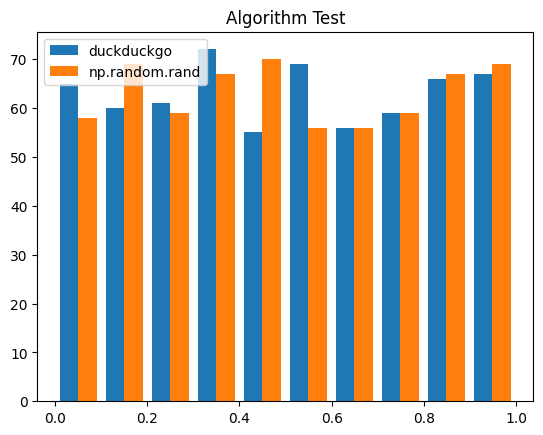

In [59]:
plt.title('Algorithm Test')
plt.hist([hist, real], label=['duckduckgo', 'np.random.rand'])
plt.legend()
plt.show()